In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DataAccident as data
import datetime

'''
Pour créer les dataframes présent dans les csv
'''
df2018 = data.getData2018Merge()
df2017 = data.getData2017Merge()
df2016 = data.getData2016Merge()
df2015 = data.getData2015Merge()

'''
Et les concatener en un seul
'''
df = pd.concat([df2015,df2016,df2017,df2018])
'''
Pour importer les données dans des csv des 4 années
'''
# df2015.to_csv('données/result/result2015.csv',index=True)
# df2016.to_csv('données/result/result2016.csv',index=True)
# df2017.to_csv('données/result/result2017.csv',index=True)
# df2018.to_csv('données/result/result2018.csv',index=True)
# df.to_csv("données/result/result.csv",index=True)


# Lit un CSV qui est la concatenation de la totalité des 4 années
# df = pd.read_csv("données/result/result.csv",",",encoding='utf-8',low_memory=False)


'\nPour importer les données dans des csv des 4 années\n'

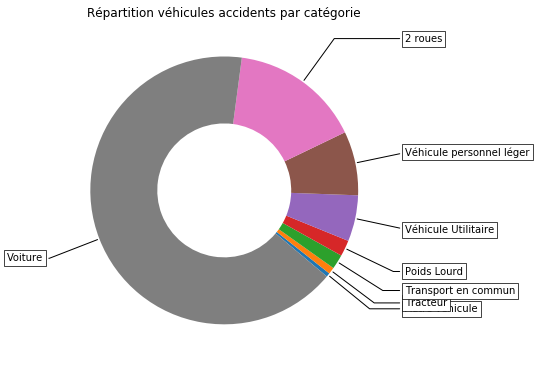

lum  \
Num_Acc      num_veh_x num_veh_y                                      
201500000001 A01       A01                               Plein jour   
             B02       B02                               Plein jour   
201500000002 A01       A01                               Plein jour   
             B02       B02                               Plein jour   
201500000003 B02       B02                               Plein jour   
...                                                             ...   
201800057781 A01       A01        Nuit avec éclairage public allumé   
201800057782 A01       A01        Nuit avec éclairage public allumé   
             B01       B01        Nuit avec éclairage public allumé   
201800057783 B01       B01                               Plein jour   
             A01       A01                               Plein jour   

                                             agglo                int  \
Num_Acc      num_veh_x num_veh_y                                        
201500000001 A01       A01        En agglomération  Hors Intersection   
             B02       B02        En agglomération  Hors Intersection   
201500000002 A01       A01        En agglomération  Hors Intersection   
             B02       B02        En agglomération  Hors Intersection   
201500000003 B02       B02        En agglomération  Hors Intersection   
...                                            ...                ...   
201800057781 A01       A01        En agglomération  Hors Intersection   
201800057782 A01       A01        En agglomération  Hors Intersection   
             B01       B01        En agglomération  Hors Intersection   
201800057783 B01       B01        En agglomération  Hors Intersection   
             A01       A01        En agglomération  Hors Intersection   

                                      atm                             col  \
Num_Acc      num_veh_x num_veh_y                                            
201500000001 A01       A01        Normale    Deux véhicules – par le coté   
             B02       B02        Normale    Deux véhicules – par le coté   
201500000002 A01       A01        Normale       Deux véhicules - frontale   
             B02       B02        Normale       Deux véhicules - frontale   
201500000003 B02       B02        Normale  Deux véhicules – par l’arrière   
...                                   ...                             ...   
201800057781 A01       A01        Normale                 Autre collision   
201800057782 A01       A01        Normale       Deux véhicules - frontale   
             B01       B01        Normale       Deux véhicules - frontale   
201800057783 B01       B01        Normale       Deux véhicules - frontale   
             A01       A01        Normale       Deux véhicules - frontale   

                                                       adr        gps  \
Num_Acc      num_veh_x num_veh_y                                        
201500000001 A01       A01               54 RUE GHESQUIERE  Métropole   
             B02       B02               54 RUE GHESQUIERE  Métropole   
201500000002 A01       A01          25, RUE ANATOLE FRANCE  Métropole   
             B02       B02          25, RUE ANATOLE FRANCE  Métropole   
201500000003 B02       B02                   RUE NATIOANLE  Métropole   
...                                                    ...        ...   
201800057781 A01       A01         KAWENI-SPPM ( RUE DE LA    Mayotte   
201800057782 A01       A01         CAVANI-KAVANI SUD ( RUE    Mayotte   
             B01       B01         CAVANI-KAVANI SUD ( RUE    Mayotte   
201800057783 B01       B01        M'TSAPERE-NATIONALE 2 (R    Mayotte   
             A01       A01        M'TSAPERE-NATIONALE 2 (R    Mayotte   

                                        lat       long code_postal  ...  \
Num_Acc      num_veh_x num_veh_y                                    ...   
201500000001 A01       A01              0.0        0.0       59052  ...   
             

In [3]:
fig, ax = plt.subplots(figsize=(6, 10), subplot_kw=dict(aspect="equal"))

dataGcat = df.groupby(['gcat']).Num_Acc_Id.count().sort_values(ignore_index = False)
recipe = dataGcat.index

data = dataGcat.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Répartition véhicules accidents par catégorie")

plt.show()
df

D:\Programmes\Python\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


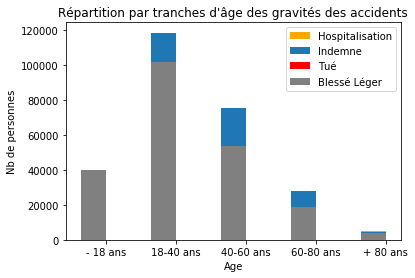

,- 18 ans,18-40 ans,40-60 ans,60-80 ans,+ 80 ans
Indemne,24778,118446,75516,27694,4595
Blessé Léger,40186,101808,53620,18715,3897
Hospitalisation,22828,49843,30538,16495,4749
Tué,1878,6241,3906,3078,1482


In [9]:
%matplotlib inline

listMonth = [i.month for i in df.date]
df.fillna(value={"date": datetime.datetime.now()})
# Ajout d'une colonne appelé Age
listAge = [float(df.date[i].year) - float(i) for i in df.an_nais]
df['age'] = listAge

catAgeEnfants = df[df['age'] <= 18]
catAgeEnfants = catAgeEnfants[catAgeEnfants['age'] >= 1]
catAgeEnfants['tranche_age'] = '- 18 ans'
catAgeEnfants

catAgeAdultes40 = df[df['age'] >= 18]
catAgeAdultes40 = catAgeAdultes40[catAgeAdultes40['age'] <= 40]
catAgeAdultes40['tranche_age'] = '18-40 ans'

catAgeAdultes60 = df[df['age'] >= 40]
catAgeAdultes60 = catAgeAdultes60[catAgeAdultes60['age'] <= 60]
catAgeAdultes60['tranche_age'] = '40-60 ans'

catAgeAdultes80 = df[df['age'] >= 60]
catAgeAdultes80 = catAgeAdultes80[catAgeAdultes80['age'] <= 80]
catAgeAdultes80['tranche_age'] = '60-80 ans'

catAgeAdultes80P = df[df['age'] >= 80]
catAgeAdultes80P['tranche_age'] = '+ 80 ans'

df = pd.concat([catAgeEnfants,catAgeAdultes40,catAgeAdultes60,catAgeAdultes80,catAgeAdultes80P])

listTrancheAgeHospi = [catAgeEnfants[catAgeEnfants['grav'] == 'Hospitalisation'].Num_Acc_Id.count(),catAgeAdultes40[catAgeAdultes40['grav'] == 'Hospitalisation'].Num_Acc_Id.count(),catAgeAdultes60[catAgeAdultes60['grav'] == 'Hospitalisation'].Num_Acc_Id.count(),catAgeAdultes80[catAgeAdultes80['grav'] == 'Hospitalisation'].Num_Acc_Id.count(),catAgeAdultes80P[catAgeAdultes80P['grav'] == 'Hospitalisation'].Num_Acc_Id.count()]
listTrancheAgeIndemme = [catAgeEnfants[catAgeEnfants['grav'] == 'Indemne'].Num_Acc_Id.count(),catAgeAdultes40[catAgeAdultes40['grav'] == 'Indemne'].Num_Acc_Id.count(),catAgeAdultes60[catAgeAdultes60['grav'] == 'Indemne'].Num_Acc_Id.count(),catAgeAdultes80[catAgeAdultes80['grav'] == 'Indemne'].Num_Acc_Id.count(),catAgeAdultes80P[catAgeAdultes80P['grav'] == 'Indemne'].Num_Acc_Id.count()]
listTrancheAgeTue = [catAgeEnfants[catAgeEnfants['grav'] == 'Tué'].Num_Acc_Id.count(),catAgeAdultes40[catAgeAdultes40['grav'] == 'Tué'].Num_Acc_Id.count(),catAgeAdultes60[catAgeAdultes60['grav'] == 'Tué'].Num_Acc_Id.count(),catAgeAdultes80[catAgeAdultes80['grav'] == 'Tué'].Num_Acc_Id.count(),catAgeAdultes80P[catAgeAdultes80P['grav'] == 'Tué'].Num_Acc_Id.count()]
listTrancheAgeBlL = [catAgeEnfants[catAgeEnfants['grav'] == 'Blessé léger'].Num_Acc_Id.count(),catAgeAdultes40[catAgeAdultes40['grav'] == 'Blessé léger'].Num_Acc_Id.count(),catAgeAdultes60[catAgeAdultes60['grav'] == 'Blessé léger'].Num_Acc_Id.count(),catAgeAdultes80[catAgeAdultes80['grav'] == 'Blessé léger'].Num_Acc_Id.count(),catAgeAdultes80P[catAgeAdultes80P['grav'] == 'Blessé léger'].Num_Acc_Id.count()]

labels = ['- 18 ans','18-40 ans','40-60 ans','60-80 ans','+ 80 ans']
#Définition des composants graphiques
fig, ax = plt.subplots()

x = np.arange(len(labels))
width = 0.35
ax.set_ylabel('Nb de personnes')
ax.set_xlabel('Age')
ax.set_title("Répartition par tranches d'âge des gravités des accidents")
ax.set_xticks(x)
ax.set_xticklabels(labels)

r = [0,1,2,3,4]
ax.bar(x - width/2, listTrancheAgeHospi, width,label='Hospitalisation',color='orange')
ax.bar(x - width/2, listTrancheAgeIndemme, width,label='Indemne')
ax.bar(x - width/2, listTrancheAgeTue, width,label='Tué',color='red')
ax.bar(x - width/2, listTrancheAgeBlL, width,label='Blessé Léger',color='grey')
ax.legend()
plt.show()
data = [listTrancheAgeIndemme,listTrancheAgeBlL,listTrancheAgeHospi,listTrancheAgeTue]
dataFrameLegends = pd.DataFrame(data, columns = ['- 18 ans','18-40 ans','40-60 ans','60-80 ans','+ 80 ans'],index = ["Indemne","Blessé Léger","Hospitalisation","Tué"]) 
dataFrameLegends

In [8]:
import seaborn as sns

# Répartition de la gravité des accidents par année
ax = sns.countplot(x="an", hue="grav", data=df, hue_order=['Indemne','Blessé léger','Hospitalisation','Tué'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Répartition de la gravité des accidents par année')

ValueError: Could not interpret input 'an'

,- 18 ans,18-40 ans,40-60 ans,60-80 ans,+ 80 ans
Indemne,20153,109853,69520,25085,4014
Blessé Léger,34999,93757,49387,16879,3430
Hospitalisation,19830,45511,28181,14954,4231
Tué,1519,5725,3603,2800,1350


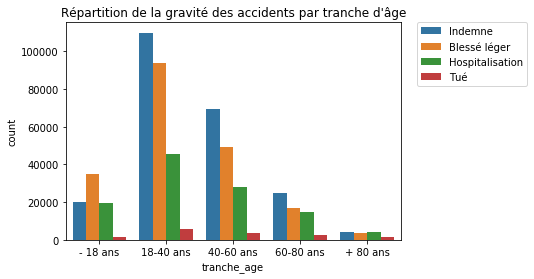

In [7]:
# Répartition de la gravité des accidents par année
ax1 = sns.countplot(x="tranche_age", hue="grav", data=df, hue_order=['Indemne','Blessé léger','Hospitalisation','Tué'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Répartition de la gravité des accidents par tranche d\'âge')

data = [listTrancheAgeIndemme,listTrancheAgeBlL,listTrancheAgeHospi,listTrancheAgeTue]
dataFrameLegends = pd.DataFrame(data, columns = ['- 18 ans','18-40 ans','40-60 ans','60-80 ans','+ 80 ans'],index = ["Indemne","Blessé Léger","Hospitalisation","Tué"]) 
dataFrameLegends

In [ ]:
# Âge des piétons tués par année et par tranche d\'âge sur le chemin du travail ou de l'école

sns.set(style="ticks")
dataGraphDomTr = df[df['trajet'] == 'Domicile - travail']
dataGraphDomEc = df[df['trajet'] == 'Domicile - école']
dataGraph = pd.concat([dataGraphDomTr,dataGraphDomEc])
dataGraph = dataGraph[dataGraph['grav'] == 'Tué']
dataGraph = dataGraph[dataGraph['catu'] == 'Piéton']
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="an", y="age", hue="tranche_age", data=dataGraph[dataGraph['age'] < 2000],legend_out=False)
plt.title('Âge des piétons tué par année et par tranche d\'âge')
plt.ylabel('Âge')
plt.xlabel('Année')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print('')

In [ ]:
# Âge des conducteurs tués par année et par tranche d\'âge sur le chemin du travail ou de l'école

sns.set(style="ticks")
dataGraphDomTr = df[df['trajet'] == 'Domicile - travail']
dataGraphDomEc = df[df['trajet'] == 'Domicile - école']
dataGraph = pd.concat([dataGraphDomTr,dataGraphDomEc])
dataGraph = dataGraph[dataGraph['grav'] == 'Tué']
dataGraph = dataGraph[dataGraph['catu'] == 'Conducteur']
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="an", y="age", hue="tranche_age", data=dataGraph[dataGraph['age'] < 2000],legend_out=False)
plt.title('Âge des conducteurs tués par année et par tranche d\'âge')
plt.ylabel('Âge')
plt.xlabel('Année')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print('')